In [453]:
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''...'''

    def __init__(self, path_to_data, path_to_output):
        self.path_to_data = path_to_data
        self.d = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
                    'Dictionary - not stemmed' : 'Dictionary - not stemmed',
                    'SVC count embedding' : 'SVM count embedding',
                    'SVC tfidf embedding' : 'SVM tfidf embedding',
                    'ET count' : 'ET count',
                    'ET tfidf' : 'ET tfidf',
                    'ET count embedding' : 'ET count embedding',
                    'SVC tfidf' : 'SVM tfidf',
                    'SVC count' : 'SVM count',
                    'ET tifdf embedding' : 'ET tfidf embedding',
                    'PA tfidf' : 'PA tfidf',
                    'PA count' : 'PA count',
                    'PA count embedding' : 'PA count embedding',
                    'PA tfidf embedding' : 'PA tfidf embedding',
                    'SGD count' : 'SGD count',
                    'SGD count embedding' : 'SGD count embedding',
                    'SGD tfidf' : 'SGD tfidf',
                    'SGD tfidf embedding' : 'SGD tfidf embedding' }
        
        self.emb = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
                    'Dictionary - not stemmed' : 'Dictionary - not stemmed',
                    'SVM count embedding' : 'embedding vectorizer',
                    'SVM tfidf embedding' : 'embedding vectorizer',
                    'ET count' : 'vectorizer',
                    'ET tfidf' : 'vectorizer',
                    'ET count embedding' : 'embedding vectorizer',
                    'SVM tfidf' : 'vectorizer',
                    'SVM count' : 'vectorizer',
                    'ET tifdf embedding' : 'embedding vectorizer',
                    'PA tfidf' : 'vectorizer',
                    'PA count' : 'vectorizer',
                    'PA count embedding' : 'embedding vectorizer',
                    'PA tfidf embedding' : 'embedding vectorizer',
                    'SGD count' : 'vectorizer',
                    'SGD count embedding' : 'embedding vectorizer',
                    'SGD tfidf' : 'vectorizer',
                    'SGD tfidf embedding' : 'embedding vectorizer' }
        
        
        self.path_to_output = path_to_output
        self.translator = {'hmnintrst' : 'Human interest', 'ecnmc' : 'Economic consequences', 'cnflct' : 'Conflict',
                           'attrresp' : 'Attribution of responsibility'}
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())
    
    def Clean_dictionary_data(self, fname):
        
        logger.info(fname)
        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        frames = []
        precision = []
        recall = []
        f1score=[]
        accuracy=[]
        trainingsize = []

        for i in dictdump:
            for k, v in i.items():
                for keys, values in v.items():
                    frames.append(keys)
                    precision.append(values[0])
                    recall.append(values[1])
                    f1score.append(values[2])
                    accuracy.append(values[3])
                    trainingsize.append(k)
                    
        df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
        df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
        df.set_index('frame', inplace=True)

        return df
    
    def get_data_dictionary(self):
        
        fname =  f'{self.path_to_data}precision_recall_f1score_dictionary_stemmed_FRAMES.json'
        df1 = self.Clean_dictionary_data(fname)
        df1['classifier'] = 'Dictionary - stemmed'

        fname_notstemmed = f'{self.path_to_data}precision_recall_f1score_dictionary_not_stemmed_FRAMES.json'
        df2 =  df = self.Clean_dictionary_data(fname_notstemmed)
        df2['classifier'] = 'Dictionary - not stemmed'

        df = pd.concat([df1, df2])
        #df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df

    def get_data_sml(self):

        fname_sml = '{}learning_rate_SML.csv'.format(self.path_to_data)
        
        df = pd.read_csv(fname_sml)
        df['frame'].replace(self.translator, inplace=True)
        df.set_index('frame', inplace=True)

        df = df[['algorithm','f1_weighted', 'precision_weighted',  'recall_score_weighted', 'accuracy', 'length_training_set']]
        df.rename(columns={'algorithm': 'classifier', 'f1_weighted' : 'f1-score', 'precision_weighted' : 'precision', 'recall_score_weighted' : 'recall', 'length_training_set': 'training size'}, inplace=True)
        df['approach'] = 'SML'

        return df

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df = pd.concat([df1, df2])
     #   df.drop('total', inplace=True)
        df['Frame'] = df.index
        df.reset_index(inplace=True)
        df['classifier'] = df['classifier'].map(self.d)
        df['vectorizer'] = df['classifier'].map(self.emb)
        df["training size"] = pd.to_numeric(df["training size"])
        return df
    

In [1020]:
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''...'''

    def __init__(self, path_to_data, path_to_output):
        self.path_to_data = path_to_data
        self.d = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
                    'Dictionary - not stemmed' : 'Dictionary - not stemmed',
                   'SVC count' : 'SVM count',  
                   'SVC tfidf' : 'SVM tfidf',
                   
                  
                    'SVC count embedding' : 'SVM count embedding mean',
                    'SVC tfidf embedding' : 'SVM tfidf embedding mean',
                    'SVC count embedding max' : 'SVM count embedding max',
                    'SVC tfidf embedding max' : 'SVM tfidf embedding max',
                    'SVC count embedding sum' : 'SVM count embedding sum',
                    'SVC tfidf embedding sum' : 'SVM tfidf embedding sum',
                    'ET count' : 'ET count',
                    'ET tfidf' : 'ET tfidf',
                  
                    'ET count embedding' : 'ET count embedding mean',
                    'ET tifdf embedding' : 'ET tfidf embedding mean',
                    'ET count embedding max' : 'ET count embedding max',
                    'ET tifdf embedding max' : 'ET tfidf embedding max',
                    'ET count embedding sum' : 'ET count embedding sum',
                    'ET tifdf embedding sum' : 'ET tfidf embedding sum',
                  
                    'PA count' : 'PA count',
                    
                    'PA tfidf' : 'PA tfidf',
                  
                  
                    'PA count embedding' : 'PA count embedding mean',
                    'PA tfidf embedding' : 'PA tfidf embedding mean',
                    'PA count embedding max' : 'PA count embedding max',
                    'PA tfidf embedding max' : 'PA tfidf embedding max',     
                    'PA count embedding sum' : 'PA count embedding sum',
                    'PA tfidf embedding sum' : 'PA tfidf embedding sum',
                  
                  
                    'SGD count' : 'SGD count',
                    'SGD tfidf' : 'SGD tfidf',
                  
                    'SGD count embedding' : 'SGD count embedding mean',
                    'SGD tfidf embedding' : 'SGD tfidf embedding mean' ,
                    'SGD count embedding max' : 'SGD count embedding max',
                    'SGD tfidf embedding max' : 'SGD tfidf embedding max' ,
                    'SGD count embedding sum' : 'SGD count embedding sum',
                    'SGD tfidf embedding sum' : 'SGD tfidf embedding sum'  }
        
        #self.emb = self.Vectorizer_dict()
        self.emb = self.Vectorizer_dict_()
        self.path_to_output = path_to_output
        self.translator = {'hmnintrst' : 'Human interest', 'ecnmc' : 'Economic consequences', 'cnflct' : 'Conflict',
                           'attrresp' : 'Attribution of responsibility'}
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())
    def Vectorizer_dict(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            try:
                if v.split()[2] == 'embedding':
                    outcome = f'{v.split()[1]} embedding vectorizer'
                else:
                    outcome =  v
            except:
                outcome = f'{v.split()[1]} vectorizer'

            new_dict[v] = outcome
        return new_dict
    
    def Vectorizer_dict_(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            try:
                if v.split()[2] == 'embedding':
                    outcome = f'embedding vectorizer'
                else:
                    outcome =  v
            except:
                #outcome = f'{v.split()[1]} vectorizer'
                outcome = f'baseline vectorizer'

            new_dict[v] = outcome
        return new_dict
    
    def Clean_dictionary_data(self, fname):
        
        logger.info(fname)
        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        frames = []
        precision = []
        recall = []
        f1score=[]
        accuracy=[]
        trainingsize = []

        for i in dictdump:
            for k, v in i.items():
                for keys, values in v.items():
                    frames.append(keys)
                    precision.append(values[0])
                    recall.append(values[1])
                    f1score.append(values[2])
                    accuracy.append(values[3])
                    trainingsize.append(k)
                    
        df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
        df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
        df.set_index('frame', inplace=True)

        return df
    
    def get_data_dictionary(self):
        
        fname =  f'{self.path_to_data}precision_recall_f1score_dictionary_stemmed_FRAMES.json'
        df1 = self.Clean_dictionary_data(fname)
        df1['classifier'] = 'Dictionary - stemmed'

        fname_notstemmed = f'{self.path_to_data}precision_recall_f1score_dictionary_not_stemmed_FRAMES.json'
        df2 =  df = self.Clean_dictionary_data(fname_notstemmed)
        df2['classifier'] = 'Dictionary - not stemmed'

        df = pd.concat([df1, df2])
        #df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df

    def get_data_sml(self):

        fname_sml = '{}learning_rate_SML.csv'.format(self.path_to_data)
        
        df = pd.read_csv(fname_sml)
        df['frame'].replace(self.translator, inplace=True)
        df.set_index('frame', inplace=True)

        df = df[['algorithm','f1_weighted', 'precision_weighted',  'recall_score_weighted', 'accuracy', 'length_training_set']]
        df.rename(columns={'algorithm': 'classifier', 'f1_weighted' : 'f1-score', 'precision_weighted' : 'precision', 'recall_score_weighted' : 'recall', 'length_training_set': 'training size'}, inplace=True)
        df['approach'] = 'SML'

        return df

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df = pd.concat([df1, df2])
     #   df.drop('total', inplace=True)
        df['Frame'] = df.index
        df.reset_index(inplace=True)
        df['classifier'] = df['classifier'].map(self.d)
        df['vectorizer'] = df['classifier'].map(self.emb)
        df["training size"] = pd.to_numeric(df["training size"])
        return df
    

In [1034]:
path_to_data = '../output/frames/new/'
path_to_output ='../output/'

a = plot_accuracy_precision_recall(path_to_data, path_to_output)
df = a.combine_datasets()

INFO:root:../output/frames/new/precision_recall_f1score_dictionary_stemmed_FRAMES.json
INFO:root:../output/frames/new/precision_recall_f1score_dictionary_not_stemmed_FRAMES.json
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:161: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [888]:
from collections import Counter


22

In [1052]:
df.sort_values(['training size'])['training size'].to_list()
trainsize = df['training size'].to_list()
a = dict(Counter(trainsize))

repeat = [v for k, v in a.items()][0]

STEPS = 3

new = df['training size'].unique()[1::STEPS]
new_list = list(itertools.chain.from_iterable(itertools.repeat(x, repeat * STEPS) for x in new)) + [df['training size'].unique()[-1]] * (repeat *2)

final = []
for i, e in zip(trainsize, new_list):
    final.append(e)

In [1053]:
len(trainsize) == len(final)

True

In [1054]:
df.sort_values(['training size'], inplace=True)

In [1055]:
df['aggregate'] = final

In [1056]:
df_ = df.groupby(['aggregate', 'frame', 'classifier', 'vectorizer']).mean()
df_.reset_index(inplace=True)
df_

aggregate                          frame                classifier  \
0            20  Attribution of responsibility  Dictionary - not stemmed   
1            20  Attribution of responsibility      Dictionary - stemmed   
2            20  Attribution of responsibility                  ET count   
3            20  Attribution of responsibility    ET count embedding max   
4            20  Attribution of responsibility   ET count embedding mean   
...         ...                            ...                       ...   
4075        890                 Human interest   SVM count embedding sum   
4076        890                 Human interest                 SVM tfidf   
4077        890                 Human interest   SVM tfidf embedding max   
4078        890                 Human interest  SVM tfidf embedding mean   
4079        890                 Human interest   SVM tfidf embedding sum   

                    vectorizer  accuracy  f1-score  precision    recall  \
0     Dictionary - not stemmed  0.520179  0.495189   0.559886  0.520179   
1         Dictionary - stemmed  0.527653  0.499084   0.570139  0.527653   
2          baseline vectorizer  0.556054  0.421253   0.447739  0.556054   
3         embedding vectorizer  0.550075  0.489692   0.527262  0.550075   
4         embedding vectorizer  0.554559  0.534985   0.556204  0.554559   
...                        ...       ...       ...        ...       ...   
4075      embedding vectorizer  0.775785  0.677832   0.601842  0.775785   
4076       baseline vectorizer  0.775785  0.677832   0.601842  0.775785   
4077      embedding vectorizer  0.775785  0.693441   0.717857  0.775785   
4078      embedding vectorizer  0.784753  0.718469   0.753546  0.784753   
4079      embedding vectorizer  0.771300  0.675620   0.601058  0.771300   

      training size  
0              20.0  
1              20.0  
2              20.0  
3              20.0  
4              20.0  
...             ...  
4075          884.5  
4076          884.5  
4077          884.5  
4078          884.5  
4079          884.5  

[4080 rows x 9 columns]

['Dictionary - not stemmed', 'Dictionary - stemmed', 'PA tfidf', 'SVM count embedding mean']


INFO:root:saved file: ../output/lineplot-Attribution of responsibility-top-4


['Dictionary - not stemmed', 'Dictionary - stemmed', 'PA count', 'SVM tfidf embedding mean']


INFO:root:saved file: ../output/lineplot-Conflict-top-4


['Dictionary - not stemmed', 'Dictionary - stemmed', 'PA count', 'SVM count embedding mean']


INFO:root:saved file: ../output/lineplot-Economic consequences-top-4


['Dictionary - not stemmed', 'Dictionary - stemmed', 'SGD tfidf', 'ET tfidf embedding mean']


INFO:root:saved file: ../output/lineplot-Human interest-top-4


<Figure size 842.4x595.44 with 0 Axes>

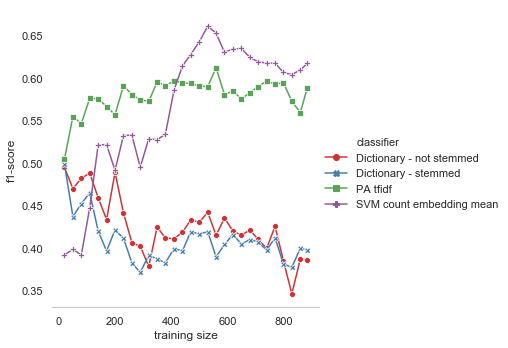

<Figure size 842.4x595.44 with 0 Axes>

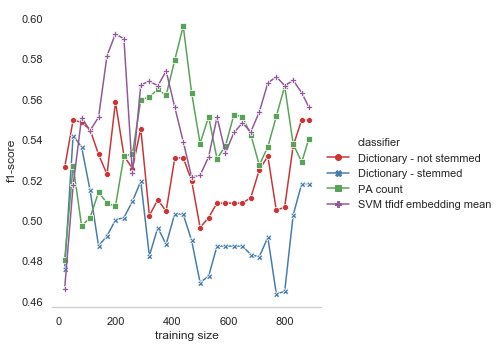

<Figure size 842.4x595.44 with 0 Axes>

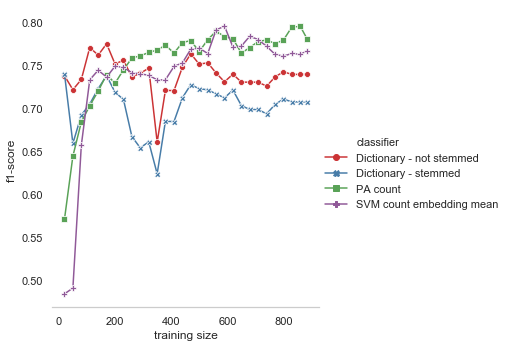

<Figure size 842.4x595.44 with 0 Axes>

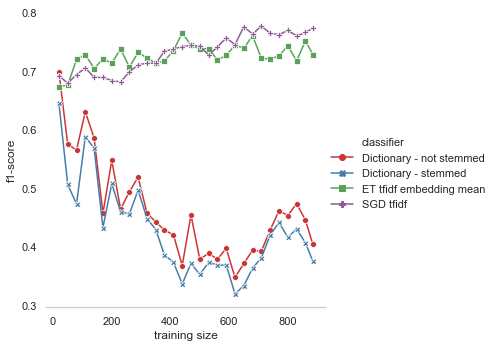

In [1073]:
import seaborn
import matplotlib.pyplot as plt
from pylab import savefig
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Set1", 8, .75)

class Make_learning_curves():
    
    def __init__(self, df, outputpath):
        self.frames = ['Attribution of responsibility', 'Conflict', 'Economic consequences', 'Human interest']
        self.df = df
        self.topN = 4
        self.outputpath = outputpath
        
    def Return_best_classifiers(self, frame):
        return self.df[ ( self.df['training size'] == 890 ) & (df['frame'] == frame) ].sort_values(['Frame', 'f1-score'], ascending=False)['classifier'].head(self.topN).to_list()

    def Return_best_of_vectorizers(self, frame):
        data = self.df[self.df['frame']==frame]
        data = data.loc[data.groupby('vectorizer')['f1-score'].idxmax()]
        return data['classifier'].to_list()

    def Get_line_plot(self,frame):
        #best_results = self.Return_best_classifiers(frame)
        best_results = self.Return_best_of_vectorizers(frame)
        print(best_results)

        data = self.df[self.df["frame"]== frame]
        data = data[data['classifier'].isin(best_results)]
        #data = data[~data['classifier'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])]
        
       # print(len(data['vectorizer'].unique() ) )
        pal_ = ['silver', 'dimgrey', 'black', 'grey']
        pal = pal_[:len(data['vectorizer'].unique() )] 
        hue_order = ['embedding vectorizer', 'tfidf vectorizer', 'count vectorizer']
        hue_order = hue_order [:len(data['vectorizer'].unique() )] 
         
        plt.figure()

        fig = sns.relplot(data=data, 
                     x="training size", 
                     y="f1-score", 
                     hue='classifier', 
                     kind='line',
                    # ci="sd",
                    # hue_order =hue_order, 
                     style = 'classifier',
                     #palette=pal,
                     markers=True, dashes=False )
                            
                     #palette=pal) 
        return fig
    
    def Get_figures_and_save(self):
        for frame in self.frames:
            fig = self.Get_line_plot(frame)
            
            fig.despine(left=True)
           # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            fname = f"{self.outputpath}lineplot-{frame}-top-{self.topN}"
            #figure = fig.get_figure()
            fig.savefig(fname)
            logging.info(f'saved file: {fname}')

a = Make_learning_curves(df = df_, outputpath = '../output/')
a.Get_figures_and_save()


In [882]:

 = []

for item in trainsize:
    print(f"training size: {item}")
    for x in new:
        print(x)
        if item <= x:
            print("smaller or equal")
            #new_list.append(x)
        else: 
            print("not")
            

training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
sma

130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450


smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equ

smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller

90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or 

smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
tra

450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or

not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smalle

training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not


smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
sm

810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
89

smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 50
50
smaller or equal
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
sm

smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 70
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 70
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller

90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 70
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 70
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smal

smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 70
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 70
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller

smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller

50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
2

smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller

730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 90
50
not
90
smaller or equal
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
sma

smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 110
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 110
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or

610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 110
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 110
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smalle

not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
sm

490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smalle

smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size:

170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 130
50
not
90
not
130
smaller or equal
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smalle

smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equa

smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150


not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller

smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 150
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equa

730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 170
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 170
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 

210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 170
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 170
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or 

610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 170
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 170
50
not
90
not
130
not
170
smaller or equal
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or 

90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equ

490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal

smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 190
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or eq

370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal

smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170


not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 210
50
not
90
not
130
not
170
not
210
smaller or equal
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smal

smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smal

smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or

not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal


smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 230
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smal

smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 250
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 250
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smal

not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 250
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 250
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller o

570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 250
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 250
50
not
90
not
130
not
170
not
210
not
250
smaller or equal
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890


not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smal

smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller o

not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
61

training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 270
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
sma

smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller o

810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
sma

210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 290
50
not
90
not
130
not
170
not
210
not
250
not
290
smaller or equal
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or

smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
no

90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
small

smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 310

not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal

850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530


250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equa

530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 330
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
smaller or equal
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size:

smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
s

210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smal

smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
n

890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 350
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
6

not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770


smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
tr

smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
s

not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 370
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
smaller or equal
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or eq

smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
n

training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equa

410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 389
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
tra

730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equa

90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810

370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 410
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
smaller or equal
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or e

smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal

50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or

450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 430
50
not
90
not
130
not
170
not
2

training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or e

not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50


690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 450
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
smaller or equal
490
smaller or equal
530
smaller or equal
570
smaller or e

170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not


smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or eq

training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 469
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller o

smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450


810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller o

not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
smaller or equal
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 490
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330


770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smalle

not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290

450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or 

730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 509
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smalle

130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 530
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 530
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 530
50
not
90
not
130
not
170
not
210
not
250
not

610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 530
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 530
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 530
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
smaller or equal
570
smaller or equal
610
smaller or equal
650
smalle

not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
53

570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
sma

smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not

250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 549
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
sm

730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
sma

130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
no

410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 570
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
smaller or equal
610
smaller or eq

810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
n

290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690

570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 589
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or eq

50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not

530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
small

training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 610
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
smaller or equal
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
5

not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or 

smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 629
50
not
90
not
130
not
170
not
210
not
250
not
290

290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller o

not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equa

smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
n

not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 650
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
smaller or equal
690
smaller or equal
730
smaller or equal
770
smaller or equal
810


650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210


130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller 

530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 669
50
not
90


smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730


not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smal

690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
smaller or equal
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 690
50
not
90
not
130
not
170
not
210
not
250


not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90


650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not


training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 709
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smalle

not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250


not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130


210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 730
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
smaller or equal
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 73

not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not


90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
n

not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 749
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not


smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890

690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770


650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
smaller or equal
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 770
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730


330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not


not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
sma

170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 789
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not


690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 810
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 810
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 810
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
smaller or equal
training size: 810
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
smaller or equal
850
smaller or equal
890
sm

not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
traini

50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
no

530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 829

210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
smaller or equal
890
smaller or equal
training size: 850
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810


890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
73

370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
21

770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 869
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
61

not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
no

not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
no

330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
170
not
210
not
250
not
290
not
330
not
370
not
410
not
450
not
490
not
530
not
570
not
610
not
650
not
690
not
730
not
770
not
810
not
850
not
890
smaller or equal
training size: 890
50
not
90
not
130
not
17

In [847]:
import itertools


trainsize = df['training size'].to_list()
for i in trainsize:
    print(i)

50
50
50
50
70
70
70
70
90
90
90
90
110
110
110
110
130
130
130
130
150
150
150
150
170
170
170
170
190
190
190
190
210
210
210
210
230
230
230
230
250
250
250
250
270
270
270
270
290
290
290
290
310
310
310
310
330
330
330
330
350
350
350
350
370
370
370
370
389
389
389
389
410
410
410
410
430
430
430
430
450
450
450
450
469
469
469
469
490
490
490
490
509
509
509
509
530
530
530
530
549
549
549
549
570
570
570
570
589
589
589
589
610
610
610
610
629
629
629
629
650
650
650
650
669
669
669
669
690
690
690
690
709
709
709
709
730
730
730
730
749
749
749
749
770
770
770
770
789
789
789
789
810
810
810
810
829
829
829
829
850
850
850
850
869
869
869
869
890
890
890
890
50
50
50
50
70
70
70
70
90
90
90
90
110
110
110
110
130
130
130
130
150
150
150
150
170
170
170
170
190
190
190
190
210
210
210
210
230
230
230
230
250
250
250
250
270
270
270
270
290
290
290
290
310
310
310
310
330
330
330
330
350
350
350
350
370
370
370
370
389
389
389
389
410
410
410
410
430
430
430
430
450
450
450
450


389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
389
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430


829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
850
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869
869


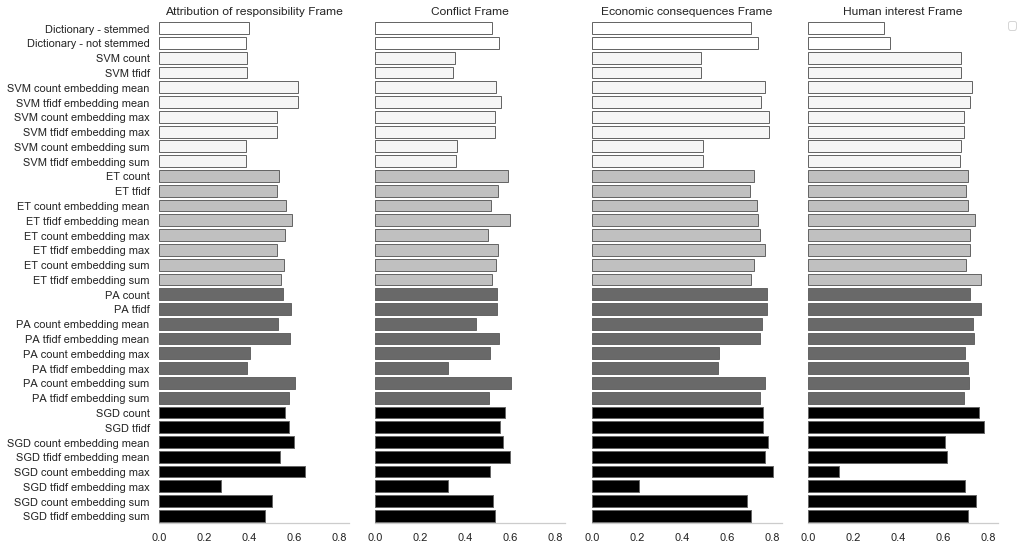

In [950]:
order = ['Dictionary - stemmed', 'Dictionary - not stemmed',  'SVM tfidf', 'SVM tfidf embedding', 'SVM count', 'SVM count embedding', 'PA tfidf', 'PA tfidf embedding', 'PA count', 'PA count embedding', 'SGD tfidf', 'SGD tfidf embedding', 'SGD count', 'SGD count embedding', 'ET tfidf', 'ET tfidf embedding', 'ET count', 'ET count embedding']
order = [f"{v}" for k, v in a.d.items()]
colour = ['white'] * 2 + ['whitesmoke'] * 8 + ['silver'] * 8 + ['dimgray'] * 8 + ['black'] * 8

ax = sns.catplot(y="classifier", x="f1-score", edgecolor=".4", palette=colour, col="Frame", order = order,
                data=df[df['training size']==890], kind="bar", saturation=.5,
                height=8, aspect=.45)

ax.set_titles("{col_name} {col_var}").despine(left=True)

ax.set(xlabel=None, ylabel=None)
ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [572]:
df[ ( df['training size'] == 890 ) & (df['frame'] == "Attribution of responsibility") ].sort_values(['Frame', 'f1-score'], ascending=False)

frame  accuracy             approach  \
2189  Attribution of responsibility  0.623318                  SML   
2194  Attribution of responsibility  0.636771                  SML   
2195  Attribution of responsibility  0.636771                  SML   
2204  Attribution of responsibility  0.623318                  SML   
2212  Attribution of responsibility  0.623318                  SML   
2213  Attribution of responsibility  0.609865                  SML   
2200  Attribution of responsibility  0.596413                  SML   
2184  Attribution of responsibility  0.596413                  SML   
2214  Attribution of responsibility  0.618834                  SML   
2205  Attribution of responsibility  0.591928                  SML   
2215  Attribution of responsibility  0.596413                  SML   
2203  Attribution of responsibility  0.591928                  SML   
2202  Attribution of responsibility  0.582960                  SML   
2201  Attribution of responsibility  0.565022                  SML   
2185  Attribution of responsibility  0.560538                  SML   
2187  Attribution of responsibility  0.573991                  SML   
2188  Attribution of responsibility  0.556054                  SML   
2210  Attribution of responsibility  0.573991                  SML   
2211  Attribution of responsibility  0.565022                  SML   
2198  Attribution of responsibility  0.582960                  SML   
2199  Attribution of responsibility  0.582960                  SML   
2208  Attribution of responsibility  0.529148                  SML   
2209  Attribution of responsibility  0.533632                  SML   
2186  Attribution of responsibility  0.538117                  SML   
2206  Attribution of responsibility  0.560538                  SML   
64    Attribution of responsibility  0.479821  Dictionary Approach   
2190  Attribution of responsibility  0.551570                  SML   
2192  Attribution of responsibility  0.551570                  SML   
2193  Attribution of responsibility  0.551570                  SML   
2207  Attribution of responsibility  0.479821                  SML   
2196  Attribution of responsibility  0.542601                  SML   
2197  Attribution of responsibility  0.542601                  SML   
132   Attribution of responsibility  0.493274  Dictionary Approach   
2191  Attribution of responsibility  0.448430                  SML   

                    classifier  f1-score  precision    recall  training size  \
2189   SGD tfidf embedding sum  0.623485   0.635896  0.623318            890   
2194  SVM count embedding mean  0.619291   0.640014  0.636771            890   
2195  SVM tfidf embedding mean  0.617630   0.641337  0.636771            890   
2204    PA count embedding sum  0.609123   0.622148  0.623318            890   
2212    ET count embedding sum  0.600719   0.627038  0.623318            890   
2213    ET tfidf embedding sum  0.598714   0.606117  0.609865            890   
2200                  PA tfidf  0.590214   0.591889  0.596413            890   
2184                 SGD tfidf  0.584184   0.591412  0.596413            890   
2214    ET count embedding max  0.583903   0.631102  0.618834            890   
2205    PA tfidf embedding sum  0.578842   0.586482  0.591928            890   
2215    ET tfidf embedding max  0.572199   0.593815  0.596413            890   
2203   PA tfidf embedding mean  0.570424   0.587557  0.591928            890   
2202   PA count embedding mean  0.569380   0.628452  0.582960            890   
2201                  PA count  0.560819   0.560455  0.565022            890   
2185                 SGD count  0.558974   0.558217  0.560538            890   
2187  SGD tfidf embedding mean  0.558597   0.620791  0.573991            890   
2188   SGD count embedding sum  0.554499   0.572151  0.556054            890   
2210   ET count embedding mean  0.545090   0.566347  0.573991            890   
2211   ET tfidf embedding mean  0.542100   0.555289  0.5650

In [617]:
def Return_best_classifiers(frame, N, df):
    return df[ ( df['training size'] == 890 ) & (df['frame'] == frame) ].sort_values(['Frame', 'f1-score'], ascending=False)['classifier'].head(N).to_list()

best_economic = Return_best_classifiers("Economic consequences", 5, df)

In [1007]:
economic = df[df['frame']=='Economic consequences']
economic.loc[economic.groupby('vectorizer')['f1-score'].idxmax()]

frame  accuracy             approach  \
198    Economic consequences  0.780269  Dictionary Approach   
26     Economic consequences  0.739910  Dictionary Approach   
10921  Economic consequences  0.811659                  SML   
10924  Economic consequences  0.834081                  SML   
7208   Economic consequences  0.811659                  SML   

                     classifier  f1-score  precision    recall  training size  \
198    Dictionary - not stemmed  0.783880   0.817568  0.780269            170   
26         Dictionary - stemmed  0.743900   0.786595  0.739910            170   
10921                  PA count  0.804132   0.814974  0.811659            829   
10924    PA count embedding sum  0.826172   0.843546  0.834081            829   
7208                   PA tfidf  0.801113   0.821837  0.811659            540   

                       Frame                vectorizer  aggregate  
198    Economic consequences  Dictionary - not stemmed         70  
26     Economic consequences      Dictionary - stemmed         70  
10921  Economic consequences          count vectorizer        740  
10924  Economic consequences      embedding vectorizer        740  
7208   Economic consequences          tfidf vectorizer        180

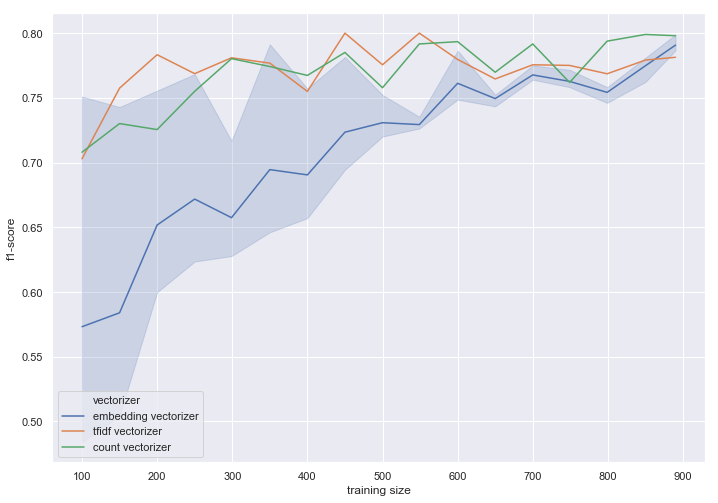

In [618]:
economic = df[df['frame']=='Economic consequences']
#sns.lineplot(data=economic [economic ['classifier'].isin(['PA count embedding sum', 'PA count', 'SVM count embedding max', 'SVM tfidf','PA tfidf'])], x="training size", y="f1-score", hue='classifier')
#sns.lineplot(data=economic [economic ['classifier'].isin(['SGD tfidf embedding sum',  'SGD tfidf', 'SGD count'])], x="training size", y="f1-score", hue='classifier')
sns.lineplot(data=economic [economic ['classifier'].isin(best_economic)], x="training size", y="f1-score", hue='vectorizer')

In [987]:
df[ ( df['training size'] == 890 ) & (df['frame'] =="Conflict") ].sort_values(['Frame', 'f1-score'], ascending=False).groupby(['vectorizer']).max()

frame  accuracy             approach  \
vectorizer                                                          
Dictionary - not stemmed  Conflict  0.569507  Dictionary Approach   
Dictionary - stemmed      Conflict  0.551570  Dictionary Approach   
count vectorizer          Conflict  0.591928                  SML   
embedding vectorizer      Conflict  0.609865                  SML   
tfidf vectorizer          Conflict  0.556054                  SML   

                                        classifier  f1-score  precision  \
vectorizer                                                                
Dictionary - not stemmed  Dictionary - not stemmed  0.549896   0.577999   
Dictionary - stemmed          Dictionary - stemmed  0.518274   0.562551   
count vectorizer                         SVM count  0.589737   0.596251   
embedding vectorizer       SVM tfidf embedding sum  0.603873   0.613658   
tfidf vectorizer                         SVM tfidf  0.555607   0.558425   

                            recall  training size     Frame  aggregate  
vectorizer                                                              
Dictionary - not stemmed  0.569507            890  Conflict        110  
Dictionary - stemmed      0.551570            890  Conflict         70  
count vectorizer          0.591928            890  Conflict        820  
embedding vectorizer      0.609865            890  Conflict        820  
tfidf vectorizer          0.556054            890  Conflict        820

In [999]:
df[ ( df['training size'] == 890 ) & (df['frame'] =="Conflict")].groupby(['vectorizer']).max()

frame  accuracy             approach  \
vectorizer                                                          
Dictionary - not stemmed  Conflict  0.569507  Dictionary Approach   
Dictionary - stemmed      Conflict  0.551570  Dictionary Approach   
count vectorizer          Conflict  0.591928                  SML   
embedding vectorizer      Conflict  0.609865                  SML   
tfidf vectorizer          Conflict  0.556054                  SML   

                                        classifier  f1-score  precision  \
vectorizer                                                                
Dictionary - not stemmed  Dictionary - not stemmed  0.549896   0.577999   
Dictionary - stemmed          Dictionary - stemmed  0.518274   0.562551   
count vectorizer                         SVM count  0.589737   0.596251   
embedding vectorizer       SVM tfidf embedding sum  0.603873   0.613658   
tfidf vectorizer                         SVM tfidf  0.555607   0.558425   

                            recall  training size     Frame  aggregate  
vectorizer                                                              
Dictionary - not stemmed  0.569507            890  Conflict        110  
Dictionary - stemmed      0.551570            890  Conflict         70  
count vectorizer          0.591928            890  Conflict        820  
embedding vectorizer      0.609865            890  Conflict        820  
tfidf vectorizer          0.556054            890  Conflict        820

KeyError: 'frame'

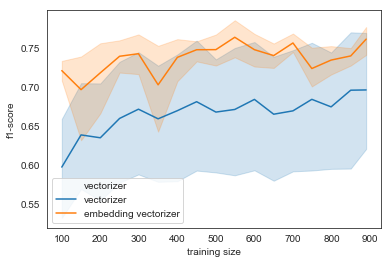

In [461]:
sns.lineplot(data=economic[~economic ['vectorizer'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])], x="training size", y="f1-score", hue="vectorizer")

In [683]:
best_hinterest = Return_best_classifiers("Human interest", 5, df)+ ['Dictionary - stemmed','Dictionary - not stemmed']


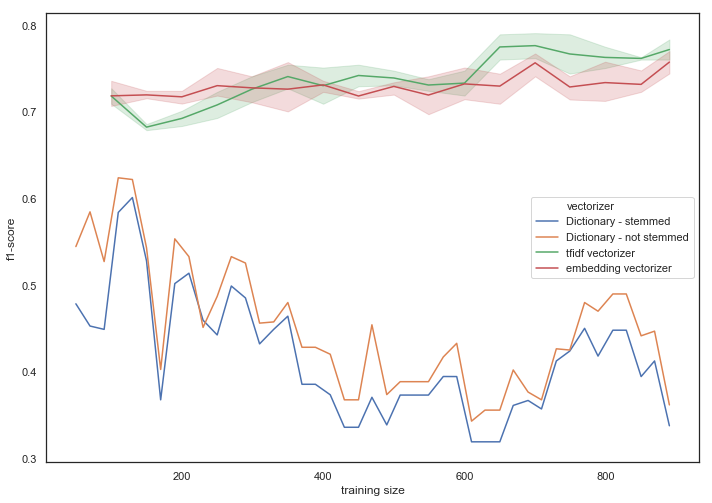

In [681]:
humaninterest = df[df['frame']=="Human interest"]
sns.lineplot(data=humaninterest[humaninterest ['classifier'].isin(best_hinterest)], x="training size", y="f1-score", hue="vectorizer")

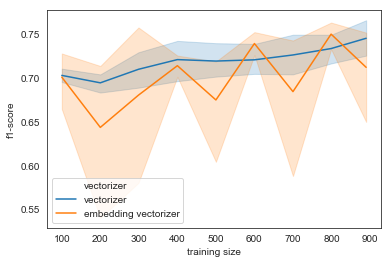

In [462]:
sns.lineplot(data=humaninterest[~humaninterest ['vectorizer'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])], x="training size", y="f1-score", hue="vectorizer")

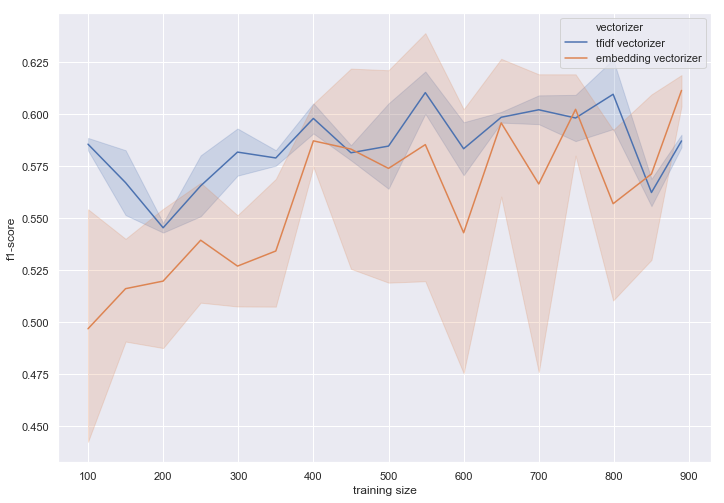

In [624]:
best_att = Return_best_classifiers("Attribution of responsibility", 8, df)

att = df[df['frame'] == 'Attribution of responsibility']
sns.lineplot(data=att[att['classifier'].isin(best_att)], x="training size", y="f1-score", hue="vectorizer")

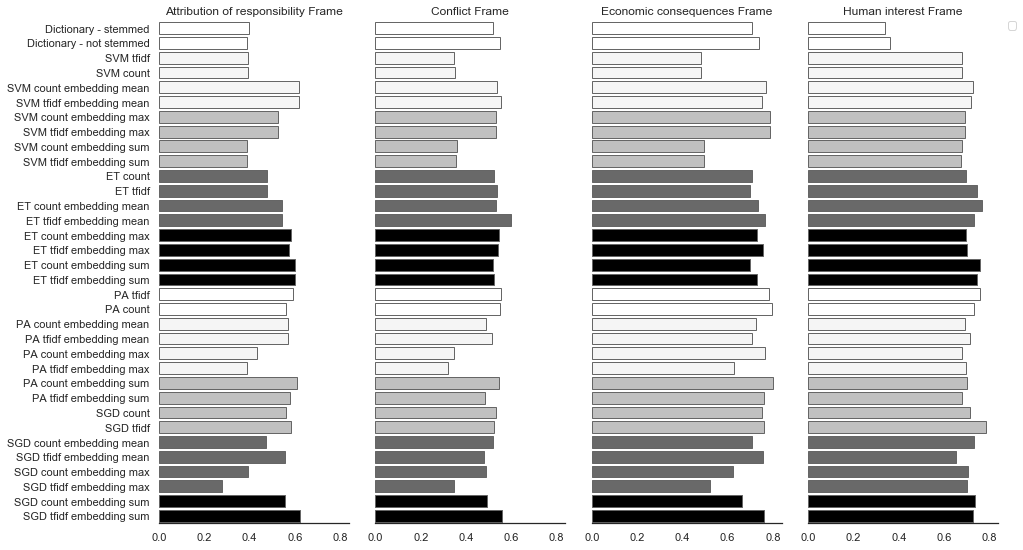

In [658]:
list(range(50, 900, 20))

[50,
 70,
 90,
 110,
 130,
 150,
 170,
 190,
 210,
 230,
 250,
 270,
 290,
 310,
 330,
 350,
 370,
 390,
 410,
 430,
 450,
 470,
 490,
 510,
 530,
 550,
 570,
 590,
 610,
 630,
 650,
 670,
 690,
 710,
 730,
 750,
 770,
 790,
 810,
 830,
 850,
 870,
 890]

In [340]:
d = { 'Dictionary - stemmed':'Dictionary - stemmed',
     'Dictionary - not stemmed':  'Dictionary - not stemmed',
     'SVC count embedding': 'Support Vector Machines (SVM) ~ w2v count',
      'SVC tfidf embedding':  'Support Vector Machines (SVM) ~ w2v tfidf',
     'ET count':  'ExtraTrees ~ count',
    'ET tfidf':  'ExtraTrees ~ tfidf',
    'ET count embedding' : 'ExtraTrees ~ w2v count',
    'SVC tfidf': 'Support Vector Machines (SVM) ~ tfidf',
    'SVC count': 'Support Vector Machines (SVM) ~ count',
        'ET tifdf embedding':  'ExtraTrees ~ w2v tfidf',
        'PA tfidf': 'Passive Agressive ~ tfidf',
        'PA count': 'Passive Agressive ~ count',
        'PA count embedding': 'Passive Agressive ~ w2v count',
        'PA tfidf embedding':  'Passive Agressive ~ w2v tfidf',
     'SGD count': 'Stochastic Gradient Descent (SGD) ~ count',
     'SGD count embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v count',
     'SGD tfidf' : 'Stochastic Gradient Descent (SGD) ~ tfidf',
     'SGD tfidf embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' }

#df['classifier_updated'] = df['classifier'].map(d)

final_recode = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
 'Dictionary - not stemmed' : 'Dictionary - not stemmed' ,
 'Support Vector Machines (SVM) ~ w2v count': 'SVM count embedding' ,
 'Support Vector Machines (SVM) ~ w2v tfidf' : 'SVM tfidf embedding' ,
 'ExtraTrees ~ count' : 'ET count',
 'ExtraTrees ~ tfidf' : 'ET tfidf',
 'ExtraTrees ~ w2v count' : 'ET count embedding',
 'Support Vector Machines (SVM) ~ tfidf' : 'SVM tfidf',
 'Support Vector Machines (SVM) ~ count' :  'SVM count',
 'ExtraTrees ~ w2v tfidf' :  'ET tfidf embedding',
 'Passive Agressive ~ tfidf' :  'PA tfidf',
 'Passive Agressive ~ count' :  'PA count',
 'Passive Agressive ~ w2v count' :  'PA count embedding',
 'Passive Agressive ~ w2v tfidf' :  'PA tfidf embedding',
 'Stochastic Gradient Descent (SGD) ~ count' :  'SGD count',
 'Stochastic Gradient Descent (SGD) ~ w2v count' : 'SGD count embedding',
 'Stochastic Gradient Descent (SGD) ~ tfidf' : 'SGD tfidf',
 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' : 'SGD tfidf embedding'}

#df['classifier_updated_final'] = df['classifier_updated'].map(final_recode)
for i, e in zip(d, final_recode.values()):
    print(i, ":", e)
    
    


SyntaxError: EOL while scanning string literal (<ipython-input-340-7bce19f666e7>, line 46)

In [ ]:
def get_data_dictionary(self):
    
    
    # getting Dictionary Approach Data
    fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(path_to_data)
    logger.info(fname)

    with open(fname) as handle:
        dictdump =  json.loads(handle.read())

    df = pd.DataFrame.from_dict(dictdump).transpose()
    df['classifier'] = 'Dictionary - stemmed'

    fname_notstemmed = '{}recision_recall_f1score_dictionary_not_stemmed_FRAMES.json'.format(self.path_to_data)
    logger.info(fname_notstemmed)

    with open(fname_notstemmed) as handle:
        dictdump =  json.loads(handle.read())

    df2 = pd.DataFrame.from_dict(dictdump).transpose()
    df2['classifier'] = 'Dictionary - not stemmed'

    df = pd.concat([df, df2])
    df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
    df.rename(index=self.translator, inplace=True)
    df['approach'] = 'Dictionary Approach'
    return df

In [290]:
fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(path_to_data)
logger.info(fname)

with open(fname) as handle:
    dictdump =  json.loads(handle.read())

#pd.DataFrame.from_dict([w for s in dictdump for w in s])

frames = []
precision = []
recall = []
f1score=[]
accuracy=[]
trainingsize = []

for i in dictdump:
    for k, v in i.items():
        for keys, values in v.items():
            frames.append(keys)
            precision.append(values[0])
            recall.append(values[1])
            f1score.append(values[2])
            accuracy.append(values[3])
            trainingsize.append(k)
           # recall.append(values[0])

        #if k == 'attrresp':
        #    print(v)
       # attrresp.append(v['attrresp'])
        #trainingsize.append(v['trainingsize'])

INFO:root:../output/frames/new/recision_recall_f1score_dictionary_stemmed_FRAMES.json


In [294]:
df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
df['classifier'] = 'Dictionary - stemmed'
df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
df.set_index('frame', inplace=True)
#df.rename(index=self.translator, inplace=True)


precision    recall   f1score  accuracy training size  \
frame                                                              
attrresp    0.558222  0.458045  0.377983  0.458045           100   
cnflct      0.554693  0.555775  0.552860  0.555775           100   
ecnmc       0.746335  0.639684  0.639684  0.639684           100   
hmnintrst   0.689287  0.486673  0.504441  0.486673           100   
attrresp    0.547928  0.442497  0.349759  0.442497           200   
cnflct      0.561483  0.553122  0.521106  0.553122           200   
ecnmc       0.767521  0.651698  0.652241  0.651698           200   
hmnintrst   0.695671  0.446878  0.454113  0.446878           200   
attrresp    0.569647  0.440344  0.343821  0.440344           300   
cnflct      0.547225  0.538745  0.485465  0.538745           300   
ecnmc       0.763162  0.619926  0.616877  0.619926           300   
hmnintrst   0.693325  0.384994  0.367936  0.384994           300   
attrresp    0.564580  0.441795  0.348864  0.441795           400   
cnflct      0.535386  0.527349  0.470728  0.527349           400   
ecnmc       0.774383  0.654979  0.656779  0.654979           400   
hmnintrst   0.677578  0.356241  0.328900  0.356241           400   
attrresp    0.533231  0.442088  0.347386  0.442088           500   
cnflct      0.522388  0.525285  0.474042  0.525285           500   
ecnmc       0.768323  0.641109  0.641285  0.641109           500   
hmnintrst   0.675055  0.430669  0.440902  0.430669           500   
attrresp    0.548610  0.450292  0.360017  0.450292           600   
cnflct      0.522448  0.524366  0.479224  0.524366           600   
ecnmc       0.760714  0.647173  0.647951  0.647173           600   
hmnintrst   0.702303  0.403509  0.400471  0.403509           600   
attrresp    0.544237  0.458937  0.373346  0.458937           699   
cnflct      0.502529  0.519324  0.449899  0.519324           699   
ecnmc       0.775437  0.688406  0.692831  0.688406           699   
hmnintrst   0.717018  0.379227  0.361307  0.379227           699   
attrresp    0.548170  0.444089  0.358425  0.444089           800   
cnflct      0.551963  0.530351  0.472627  0.530351           800   
ecnmc       0.770279  0.696486  0.700654  0.696486           800   
hmnintrst   0.750069  0.361022  0.345054  0.361022           800   
attrresp    0.554015  0.482143  0.399842  0.482143           889   
cnflct      0.549862  0.544643  0.515305  0.544643           889   
ecnmc       0.767253  0.705357  0.708467  0.705357           889   
hmnintrst   0.750222  0.357143  0.336173  0.357143           889   

                     classifier  
frame                            
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed  
attrresp   Dictionary - stemmed  
cnflct     Dictionary - stemmed  
ecnmc      Dictionary - stemmed  
hmnintrst  Dictionary - stemmed

In [217]:
[[100] * 4 ]

[[100, 100, 100, 100]]

In [161]:
path_to_data = '../output/frames/new/'
path_to_output ='../output/'


a = plot_accuracy_precision_recall(path_to_data, path_to_output)
df = a.get_data_sml()


classifier  f1-score  precision  \
frame                                                                     
Attribution of responsibility            SGD tfidf  0.552490   0.603666   
Attribution of responsibility            SGD count  0.593674   0.593341   
Attribution of responsibility  SGD count embedding  0.457096   0.610028   
Attribution of responsibility  SGD tfidf embedding  0.457354   0.561334   
Attribution of responsibility            SVC tfidf  0.392156   0.304229   
...                                            ...       ...        ...   
Human interest                  PA tfidf embedding  0.595028   0.787937   
Human interest                            ET tfidf  0.709533   0.738694   
Human interest                            ET count  0.712221   0.708554   
Human interest                  ET count embedding  0.730728   0.721633   
Human interest                  ET tifdf embedding  0.685771   0.663603   

                                 recall  accuracy  training size approach  
frame                                                                      
Attribution of responsibility  0.596413  0.596413            100      SML  
Attribution of responsibility  0.596413  0.596413            100      SML  
Attribution of responsibility  0.569507  0.569507            100      SML  
Attribution of responsibility  0.560538  0.560538            100      SML  
Attribution of responsibility  0.551570  0.551570            100      SML  
...                                 ...       ...            ...      ...  
Human interest                 0.565022  0.565022            890      SML  
Human interest                 0.780269  0.780269            890      SML  
Human interest                 0.766816  0.766816            890      SML  
Human interest                 0.762332  0.762332            890      SML  
Human interest                 0.726457  0.726457            890      SML  

[576 rows x 7 columns]

In [162]:
df[df['training size'] == 890]

classifier  f1-score  precision  \
frame                                                                     
Attribution of responsibility            SGD tfidf  0.572407   0.576829   
Attribution of responsibility            SGD count  0.573960   0.574021   
Attribution of responsibility  SGD count embedding  0.586832   0.591413   
Attribution of responsibility  SGD tfidf embedding  0.508163   0.583343   
Attribution of responsibility            SVC tfidf  0.392156   0.304229   
...                                            ...       ...        ...   
Human interest                  PA tfidf embedding  0.595028   0.787937   
Human interest                            ET tfidf  0.709533   0.738694   
Human interest                            ET count  0.712221   0.708554   
Human interest                  ET count embedding  0.730728   0.721633   
Human interest                  ET tifdf embedding  0.685771   0.663603   

                                 recall  accuracy  training size approach  
frame                                                                      
Attribution of responsibility  0.582960  0.582960            890      SML  
Attribution of responsibility  0.578475  0.578475            890      SML  
Attribution of responsibility  0.596413  0.596413            890      SML  
Attribution of responsibility  0.533632  0.533632            890      SML  
Attribution of responsibility  0.551570  0.551570            890      SML  
...                                 ...       ...            ...      ...  
Human interest                 0.565022  0.565022            890      SML  
Human interest                 0.780269  0.780269            890      SML  
Human interest                 0.766816  0.766816            890      SML  
Human interest                 0.762332  0.762332            890      SML  
Human interest                 0.726457  0.726457            890      SML  

[64 rows x 7 columns]

In [ ]:
   def __init__(self, outputpath, datapath, path_to_embeddings, vect): 
        self.vect = vect
        self.outputpath = outputpath
        self.data_path = datapath
        self.path_to_embeddings = path_to_embeddings
        #self.model = self.Load_embedding_model()
        self.training_sizes = [100, 1000]
        self.df = self.Get_data()
        self.X_train , self.X_test, self.y_train, self.y_test = train_test_split(self.df['text_clean'], self.df['main_topic_label'], test_size = 0.2 , random_state =0)
        self.names = ["Passive Agressive", "SGDClassifier" ,"SVM", "ET"]
        self.classifiers = [PassiveAggressiveClassifier(), SGDClassifier(), SVC(), ExtraTreesClassifier() ]
        self.parameters = [ {   'clf__loss': ('hinge', 'squared_hinge'),
                                'clf__C': (0.01, 0.5, 1.0)   ,
                                'clf__fit_intercept': (True, False) ,
                                'clf__max_iter': (5 ,10 ,15)} ,

                            {   'clf__max_iter': (20, 30) ,
                                'clf__alpha': (1e-2, 1e-3, 1e-5),
                                'clf__penalty': ('l2', 'elasticnet')} ,

                            {   'clf__C': [1, 10, 100, 1000],
                                'clf__gamma': [0.001, 0.0001],
                                'clf__kernel': ['rbf', 'linear']},
                           
                            {  "clf__max_features": ['auto', 'sqrt', 'log2'] } ]


In [132]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json
from sklearn.svm import SVC
import embeddingvectorizer
from sklearn.ensemble import ExtraTreesClassifier
import gensim


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class Learning_rate_SML_topics():
    
    def __init__(self, outputpath, datapath, path_to_embeddings, vect): 
        self.vect = vect
        self.outputpath = outputpath
        self.data_path = datapath
        self.model = self.Load_embedding_model()
        self.path_to_embeddings = path_to_embeddings
        self.training_sizes = [i for i in range(100, len(train), 200) ]
        self.df = self.Get_data()
        self.X_train , self.X_test, self.y_train, self.y_test = train_test_split(self.df['text_clean'], self.df['main_topic_label'], test_size = 0.2 , random_state =0)
        self.names = ["Passive Agressive", "SGDClassifier" ,"SVM", "ET"]
        self.classifiers = [PassiveAggressiveClassifier(), SGDClassifier(), SVC(), ExtraTreesClassifier() ]
        self.parameters = [ {   'clf__loss': ('hinge', 'squared_hinge'),
                                'clf__C': (0.01, 0.5, 1.0)   ,
                                'clf__fit_intercept': (True, False) ,
                                'clf__max_iter': (5 ,10 ,15)} ,

                            {   'clf__max_iter': (20, 30) ,
                                'clf__alpha': (1e-2, 1e-3, 1e-5),
                                'clf__penalty': ('l2', 'elasticnet')} ,

                            {   'clf__C': [1, 10, 100, 1000],
                                'clf__gamma': [0.001, 0.0001],
                                'clf__kernel': ['rbf', 'linear']},
                           
                            {  "clf__max_features": ['auto', 'sqrt', 'log2'] } ]

    def Get_data(self):
        df = pd.read_pickle(self.data_path)
        return df
    
    def Load_embedding_model(self):
        logging.info("\nLoading model...")

        mod = gensim.models.Word2Vec.load(self.path_to_embeddings)
        MDL = dict(zip(mod.wv.index2word, mod.wv.syn0))
        return MDL

    def Define_vectorizer(self):
    
        logging.info("this is length of the dataframe: {}".format(len(self.df)))

        if self.vect == 'tfidf':
            logging.info("the vectorizers is: {}".format(self.vect))
            VECT = TfidfVectorizer()

        elif self.vect == 'count':
            logging.info("the vectorizers is: {}".format(self.vect))
            VECT = CountVectorizer()

        elif self.vect == 'w2v_count':
            logging.info("the vectorizers is: {}".format(self.vect))

            VECT = embeddingvectorizer.EmbeddingCountVectorizer(self.model, 'mean')

        elif self.vect == 'w2v_tfidf':
            logging.info("the vectorizers is: {}".format(vect))
            VECT = embeddingvectorizer.EmbeddingTfidfVectorizer(self.model, 'mean')

        return VECT

    def Benchmark(self, n):
        test_size = 1 - (n / float(len(self.X_train)))
        
        X_train , X_test, y_train, y_test = train_test_split(self.X_train, self.y_train, test_size = test_size , random_state =0)
        logging.info(f"new length of the training TEXT: {len(X_train)} and LABELS {len(y_train)} ")
        assert len(X_train) == len(y_train)
        return X_train, y_train


    def Run_models(self):

        f_results_class = []
        f_true_predicted = []
        class_report = []
        results = []
        
        
        for trainingsize in self.training_sizes:
            logging.info(f"TRAINING SIZE{trainingsize}\n\n\n\n")

            X_train, y_train = self.Benchmark(trainingsize)
            logging.info(f"Starting analyses with the a training set of the following size: TEXT: {len(X_train)} LABELS: {len(y_train)}")


            for name, classifier, params in zip(self.names, self.classifiers, self.parameters):
                my_dict = {}
                logging.info(name)
                logging.info(classifier)
                logging.info(params)
                clf_pipe = Pipeline([
                    ('vect', self.Define_vectorizer()),
                    ('clf', classifier),
                ])


                gs_clf = GridSearchCV(clf_pipe, param_grid=params, cv=5)
                logger.info("Starting gridsearch....")
                clf = gs_clf.fit(X_train, y_train)
                score = clf.score(self.X_test, self.y_test)

                logging.info("{} score: {}".format(name, score))
                logging.info("{} are the best estimators".format(clf.best_estimator_))

                results_to_dict = classification_report((clf.best_estimator_.predict(self.X_test)), self.y_test, output_dict= True)

                results_to_dict['classifier:'] = name
                results_to_dict['training_size'] = trainingsize
                results_to_dict['best estimators:'] = clf.best_params_

                logging.info("Created dictionary with classification report: \n\n{}".format(results_to_dict))

                y_hats = clf.predict(self.X_test)

                my_dict = {"predicted": y_hats,
                           "actual" : self.y_test.values  ,
                           "classifier" : name,
                           "training_size": trainingsize}

                results.append(my_dict)
                class_report.append(results_to_dict)
        
        f_true_predicted.append(results)
        f_results_class.append(class_report)
        return f_results_class, f_true_predicted
    
    def Get_scores(self):
    
        class_report, results = self.Run_models()
        
        fname_accuracy = '{}SML_precision_recall_f1score_text_cleaned_{}.json'.format(self.outputpath, self.vect)
        fname_predictions = '{}SML_predicted_actual_text_cleaned_{}.json'.format(self.outputpath, self.vect)

        with open(fname_accuracy, mode = 'w') as fo:
            json.dump(class_report, fo)
            
        return class_report, results
    
        data = pd.DataFrame.from_dict([l for item in results for l in item ] )

        predicted = data.predicted.apply(pd.Series) \
                .merge(data, right_index = True, left_index = True) \
                .drop(["predicted"], axis = 1) \
                .melt(id_vars = ['classifier', 'training_size'], value_name = "Predicted label")
        actual = data.actual.apply(pd.Series) \
                .merge(data, right_index = True, left_index = True) \
                .drop(["predicted"], axis = 1) \
                .melt(id_vars = ['classifier', 'training_size'], value_name = "Actual label")

        df = pd.merge(predicted, actual, how = 'inner', left_index = True, right_index = True)

        df['Classifier'] = df['classifier_x']
        df['training_size'] = df['training_size_x']
        df = df[df.variable_x != 'actual']
        df = df[['Predicted label', 'Actual label', 'Classifier', 'training_size']]
        df.to_json(fname_predictions)


if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

    for vectorizer in ["w2v_count", "w2v_tfidf", "count", "tfidf"]:
        
        a = Learning_rate_SML_topics(outputpath='../output/topics/', 
                                     datapath = '/Users/anne/repos/RPA/data/intermediate/RPA_data_with_dictionaryscores.pkl', 
                                     vect = vectorizer,
                                     path_to_embeddings = '/Users/anne/repos/embedding_models/RPA/w2v_300d2000-01-01_2018-12-31')

        class_report, results = a.Get_scores()


INFO:root:TRAINING SIZE100




INFO:root:new length of the training TEXT: 100 and LABELS 100 
INFO:root:Starting analyses with the a training set of the following size: TEXT: 100 LABELS: 100
INFO:root:Passive Agressive
INFO:root:PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:root:{'clf__loss': ('hinge', 'squared_hinge'), 'clf__C': (0.01, 0.5, 1.0), 'clf__fit_intercept': (True, False), 'clf__max_iter': (5, 10, 15)}
INFO:root:this is length of the dataframe: 2807
INFO:root:the vectorizers is: count
INFO:root:Starting gridsearch....
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

INFO:root:TRAINING SIZE1000




INFO:root:new length of the training TEXT: 1000 and LABELS 1000 
INFO:root:Starting analyses with the a training set of the following size: TEXT: 1000 LABELS: 1000
INFO:root:Passive Agressive
INFO:root:PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:root:{'clf__loss': ('hinge', 'squared_hinge'), 'clf__C': (0.01, 0.5, 1.0), 'clf__fit_intercept': (True, False), 'clf__max_iter': (5, 10, 15)}
INFO:root:this is length of the dataframe: 2807
INFO:root:the vectorizers is: count
INFO:root:Starting gridsearch....
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol par

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

In [133]:
import pandas as pd
results = pd.read_csv('../output/frames/new/learning_rate_SML.csv')

In [134]:
len(results)

576

In [17]:
results['length_training_set'].unique()

array([100, 200, 299, 400, 500, 600, 700, 799, 890])

In [30]:

results[(results.frame == 'attrresp') & (results.algorithm == 'SVC tfidf embedding')]

Unnamed: 0  length_training_set     frame            algorithm  accuracy  \
7             7                  100  attrresp  SVC tfidf embedding  0.578475   
71           71                  200  attrresp  SVC tfidf embedding  0.591928   
135         135                  299  attrresp  SVC tfidf embedding  0.587444   
199         199                  400  attrresp  SVC tfidf embedding  0.600897   
263         263                  500  attrresp  SVC tfidf embedding  0.641256   
327         327                  600  attrresp  SVC tfidf embedding  0.654709   
391         391                  700  attrresp  SVC tfidf embedding  0.623318   
455         455                  799  attrresp  SVC tfidf embedding  0.614350   
519         519                  890  attrresp  SVC tfidf embedding  0.636771   

     f1_weighted  f1_macro  f1_micro  recall_score_weighted  \
7       0.449842  0.418368  0.578475               0.578475   
71      0.503588  0.478503  0.591928               0.591928   
135     0.495668  0.469926  0.587444               0.587444   
199     0.571607  0.557273  0.600897               0.600897   
263     0.634812  0.627402  0.641256               0.641256   
327     0.652050  0.646491  0.654709               0.654709   
391     0.609123  0.598921  0.623318               0.623318   
455     0.593112  0.580900  0.614350               0.614350   
519     0.617630  0.606342  0.636771               0.636771   

     precision_weighted  recall_score_macro  precision_macro  \
7              0.761071            0.530000         0.783410   
71             0.649468            0.549675         0.657637   
135            0.641355            0.544675         0.648916   
199            0.601692            0.574634         0.601887   
263            0.638982            0.628049         0.637675   
327            0.652616            0.645854         0.650428   
391            0.622148            0.604309         0.621727   
455            0.614918            0.591504         0.615082   
519            0.641337            0.614634         0.642684   

     recall_score_micro  precision_micro  
7              0.578475         0.578475  
71             0.591928         0.591928  
135            0.587444         0.587444  
199            0.600897         0.600897  
263            0.641256         0.641256  
327            0.654709         0.654709  
391            0.623318         0.623318  
455            0.614350         0.614350  
519            0.636771         0.636771

In [32]:
results[(results.frame == 'attrresp') & (results.algorithm == 'SVC tfidf embedding')].sort_values(['frame', 'f1_weighted'], ascending=False)

Unnamed: 0  length_training_set     frame            algorithm  accuracy  \
327         327                  600  attrresp  SVC tfidf embedding  0.654709   
263         263                  500  attrresp  SVC tfidf embedding  0.641256   
519         519                  890  attrresp  SVC tfidf embedding  0.636771   
391         391                  700  attrresp  SVC tfidf embedding  0.623318   
455         455                  799  attrresp  SVC tfidf embedding  0.614350   
199         199                  400  attrresp  SVC tfidf embedding  0.600897   
71           71                  200  attrresp  SVC tfidf embedding  0.591928   
135         135                  299  attrresp  SVC tfidf embedding  0.587444   
7             7                  100  attrresp  SVC tfidf embedding  0.578475   

     f1_weighted  f1_macro  f1_micro  recall_score_weighted  \
327     0.652050  0.646491  0.654709               0.654709   
263     0.634812  0.627402  0.641256               0.641256   
519     0.617630  0.606342  0.636771               0.636771   
391     0.609123  0.598921  0.623318               0.623318   
455     0.593112  0.580900  0.614350               0.614350   
199     0.571607  0.557273  0.600897               0.600897   
71      0.503588  0.478503  0.591928               0.591928   
135     0.495668  0.469926  0.587444               0.587444   
7       0.449842  0.418368  0.578475               0.578475   

     precision_weighted  recall_score_macro  precision_macro  \
327            0.652616            0.645854         0.650428   
263            0.638982            0.628049         0.637675   
519            0.641337            0.614634         0.642684   
391            0.622148            0.604309         0.621727   
455            0.614918            0.591504         0.615082   
199            0.601692            0.574634         0.601887   
71             0.649468            0.549675         0.657637   
135            0.641355            0.544675         0.648916   
7              0.761071            0.530000         0.783410   

     recall_score_micro  precision_micro  
327            0.654709         0.654709  
263            0.641256         0.641256  
519            0.636771         0.636771  
391            0.623318         0.623318  
455            0.614350         0.614350  
199            0.600897         0.600897  
71             0.591928         0.591928  
135            0.587444         0.587444  
7              0.578475         0.578475

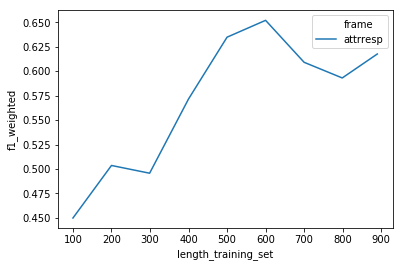

In [33]:
import seaborn as sns
sns.lineplot(data=results[(results.frame == 'attrresp') & (results.algorithm == 'SVC tfidf embedding')], x="length_training_set", y="f1_weighted", hue="frame")

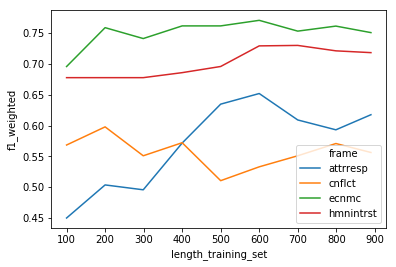

In [35]:
import seaborn as sns
sns.lineplot(data=results[results.algorithm == 'SVC tfidf embedding'], x="length_training_set", y="f1_weighted", hue="frame")

In [ ]:
#pd.DataFrame.from_dict([mydict for item in results for mydict in item])
#df.sort_values(['algorithm', 'frame', 'length_training_set'])

df = pd.DataFrame.from_dict([i for i in results])
df.sort_values(['algorithm', 'frame', 'length_training_set'])

In [ ]:
f_results = []
for i in results:
    for x in i: 
        f_results.append(x)
   # print(i)
    #f_results.append(i)
   # for k, v in i.items():
   #     print(v)
    
#f_results = [mydict for item in results for mydict in item]


In [ ]:
df = pd.DataFrame.from_dict(f_results)
df.sort_values(['frame','length_training_set'])


In [ ]:
logging.info('Saving file....')
fname = '{}SML_results_text_cleaned'.format(OUTPUTPATH)
df.to_json(fname)


# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(order,range(len(order))))
# Generate a rank column that will be used to sort
# the dataframe numerically
df['Tm_Rank'] = df['classifier_updated'].map(sorterIndex)
df.sort_values(['Frame','Tm_Rank']).to_csv('../output/results_frames.csv')


In [ ]:
df=pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)

print(f"lenght of the training data: {len(train)}")
print(f"lenght of the testing data: {len(test)}")

for n in [100, 200, 300, 400]:
    print(f"training size: {n}")
    test_size = 1 - (n / float(len(train)))
    train_set, test_set = train_test_split(train, random_state=42, test_size=test_size)
    print(f"lenght of the training data: {len(train_set)}")
    print(f"lenght of the test data: {len(test)}")

In [ ]:
PATH = '../data/intermediate/RPA_data_with_dictionaryscores.pkl'



df = pd.read_pickle(PATH)
# only keep newspaper data
df = df[df['type'] == 'newspaper']
# define frames
frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']

# 2 = not present, set to zero (0 = not present, 1 = present)
df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)
#df.rename(columns= {'text_x': 'text'}, inplace=True)

df.rename(columns= {'text_clean': 'text'}, inplace=True)

train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)


In [142]:

from sklearn.model_selection import train_test_split
df=pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
len(df)

train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)
len(train)
#len(test)



2245

In [ ]:
df=pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
df = df[df['type'] == 'newspaper']

frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']
df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)
df.rename(columns= {'text_clean': 'text'}, inplace=True)

train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)

print(f"lenght of the training data: {len(train)}")
print(f"lenght of the testing data: {len(test)}")

for n in [100, 200, 300, 400]:
    print(f"training size: {n}")
    test_size = 1 - (n / float(len(train)))
    train_set, test_set = train_test_split(train, random_state=42, test_size=test_size)
    print(f"lenght of the training data: {len(train_set)}")
    print(f"lenght of the test data: {len(test)}")
    
    ET_tfidf_pipeline = Pipeline([
                         ('tfidf', TfidfVectorizer()),
                         ('clf', OneVsRestClassifier(ExtraTreesClassifier()))
                        ]) 


    all_models = [("ET_tfidf_pipeline", ET_tfidf_pipeline ) ,]

    for f in ["attrresp"]:
        for name, model in all_models:
            clf = model.fit(train_set.text, train_set[f])
            y_pred  = clf.predict(test.text)
            print(accuracy_score(test[f], y_pred))
            print(f1_score(test[f], y_pred, average='weighted') )


In [ ]:
ET_tfidf_pipeline = Pipeline([
                         ('tfidf', TfidfVectorizer()),
                         ('clf', OneVsRestClassifier(ExtraTreesClassifier()))
                        ]) 


all_models = [("ET_tfidf_pipeline", ET_tfidf_pipeline ) ,]


for f in ["attresp"]:
    for name, model in all_models:
        clf = model.fit(train.text, train[f])
        y_pred  = clf.predict(test.text)
        print(accuracy_score(test["attrresp"], y_pred))
        print(f1_score(test["attrresp"], y_pred, average='macro') )



In [ ]:
unsorted_scores

In [ ]:
len(train)

len(train_set)

len(df)

In [ ]:
test_size = 1 - (1200 / float(len(df)))
train_set, test_set = train_test_split(df, random_state=42, test_size=test_size)
train_set, test_set
len(test_set)

In [ ]:
len(train_set)

In [ ]:
df = pd.read_pickle(PATH)
df = df[df['type'] == 'newspaper']
frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']

df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)

df.rename(columns= {'text_clean': 'text'}, inplace=True)

train, test = train_test_split(df, random_state=42, test_size=0.2)
print(len(test))

clf = ET_tfidf_pipeline.fit(train.text, train["attrresp"])
y_pred  = clf.predict(test.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')

In [ ]:
train, test_nb = train_test_split(train, random_state=42, test_size=0.8)
print(len(train))
print(len(test))

clf = ET_tfidf_pipeline.fit(train.text, train["attrresp"])
y_pred  = clf.predict(test.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.9, shuffle=True)

clf = ET_tfidf_pipeline.fit(train.text, train["attrresp"])
y_pred  = clf.predict(test.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')

In [ ]:
clf = ET_tfidf_pipeline.fit(train_set.text, train_set["attrresp"])
y_pred  = clf.predict(test_set.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test_set["attrresp"], y_pred)
f1_score(test_set["attrresp"], y_pred, average='weighted')

In [ ]:
#from sklearn.model_selection import cross_val_predict
#clf = cross_validate(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2)

clf = ET_tfidf_pipeline.fit(train_set.text, train_set["attrresp"])
y_pred  = clf.predict(test_set.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')
           


In [ ]:
#from sklearn.model_selection import cross_val_predict
#clf = cross_validate(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2)

clf = ET_tfidf_pipeline.fit(train_set.text, train_set["attrresp"])
y_pred  = clf.predict(test_set.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test_set["attrresp"], y_pred)
f1_score(test_set["attrresp"], y_pred, average='macro')

In [ ]:
import json

path_to_data = '../output/frames/new/recision_recall_f1score_dictionary_stemmed_FRAMES.json'

with open(path_to_data) as h:
    data = json.loads(h.read())

In [ ]:
training_sizes = []
attrresp = []
cnflct = []
ecnmc = []
hmnintrst = []

for i in data:
    for k, v in i.items():
        training_sizes.append(k)
        for x in v.items():
            if x[0] == 'attrresp':
                #print(f"Macro f1 score: {x[1][3]}")
                attrresp.append(x[1][3])
            elif x[0] == 'cnflct':
                cnflct.append(x[1][3])
            elif x[0] == 'ecnmc':
                ecnmc.append(x[1][3])
            elif x[0] == 'hmnintrst':
                hmnintrst.append(x[1][3])

len(training_sizes) == len(attrresp) == len(cnflct) == len(hmnintrst) == len(ecnmc)

df = pd.DataFrame(list(zip(training_sizes, attrresp, cnflct, hmnintrst, ecnmc)), 
             columns=["training_sizes", "F1", "F2", "F3", "F4"])

In [ ]:
df['id'] = df.index

In [ ]:
df = pd.wide_to_long(df, stubnames="F", i="training_sizes", j='frame')

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df['frame'] = df['frame'].map({1: 'attresp', 2:'conflct', 3: 'hmnintrst', 4: 'ecnmc'}) 

In [ ]:
import seaborn as sns
sns.lineplot(data=df, x="training_sizes", y="F", hue="frame")

In [ ]:
       

def Map_dict_to_text(self, stemmed, test_set):
    
    result = []
    if stemmed == True: type_of_text = 'stemmed_text'
    else: type_of_text = 'text'
        
    for document, documentnr in zip(test_set[type_of_text], test_set['documentnr']):
        topics_per_document = {}
        document = str(document)
        if stemmed == False:
            d = get_final_dicts()
        elif stemmed == True:
            d = get_stemmed_dict()
        for topic, words in d.items():
            try:
                match = [x for x in words if x in document.lower().split(' ')]
            except:
                print("HU", document)
                match = []

            topics_per_document = {'documentnr' : documentnr,
                                    'frame': topic,
                                    'len matches' : len(match),
                                    'words matches' : match }
            
            result.append(topics_per_document)
            
    df = pd.DataFrame.from_dict(result)
    df = df.pivot(index='documentnr', columns='frame', values='len matches')
    df[df>1] = 1
    
    return df

def Get_tp_fp_fn(self, stemmed):

    '''create columns with true postives, false positives, and false negatives'''
    
    df = self.Map_dict_to_text(stemmed = stemmed)
    df = pd.merge(test, df, how= 'left', on = 'documentnr')

    for frame, frame_d in zip(self.frames, self.frames_d):
        columnname_tp = "_tp " + str(frame)
        columnname_fp = "_fp " + str(frame)
        columnname_fn = "_fn " + str(frame)
        columnname_tn = "_tn " + str(frame)

        df[columnname_tp] = np.where( (df[frame] == 1) & (df[frame_d] == 1) , 1, 0 ) # false positive = dictionary identified, but golden standard not.
        df[columnname_fp] = np.where( (df[frame] != 1) & (df[frame_d] == 1) , 1, 0 ) # false negative = dictionary NOT identified, but golden standard DID identify
        df[columnname_fn] = np.where( (df[frame] == 1) & (df[frame_d] != 1) , 1, 0 )
        df[columnname_tn] = np.where( (df[frame] == 0) & (df[frame_d] == 0) , 1, 0 )

    return df

def Get_recall_precision(self, stemmed):

    true_positives = ["_tp " + str(i) for i in frames]
    true_negatives = ["_tn " + str(i) for i in frames]
    false_positives = ["_fp " + str(i) for i in frames]
    false_negatives = ["_fn " + str(i) for i in frames]

    recall = {}
    precision = {}
    f1score = {}
    accuracy = {}

    df = self.Get_tp_fp_fn(stemmed=stemmed)
  
    for tp, tn, fp, fn, frame, frame_d in zip(true_positives, true_negatives, false_positives, false_negatives, self.frames, self.frames_d) :
        recall[str(frame)] = recall_score(df[frame], df[frame_d], average='macro', sample_weight=None)
        precision[str(frame)] = precision_score(df[frame], df[frame_d], average='macro', sample_weight=None)
        f1score[str(frame)] = f1_score(df[frame], df[frame_d], average='macro', sample_weight=None)
        accuracy[str(frame)] = (df[tp].sum(axis=0) + df[tn].sum(axis=0)) / (df[tp].sum(axis=0) + df[tn].sum(axis=0) + df[fp].sum(axis=0) + df[fn].sum(axis=0) )

    return recall, precision, f1score, accuracy

#train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)
    
    def benchmark(self, n):
        test_size = 1 - (n / float(len(self.df)))
        train, test = train_test_split(data, random_state=42, test_size=n)
        return train, test

    def get_results():
        final_results = []
        
        for i in self.training_sizes:
            recall, precision, f1score, accuracy = self.Get_recall_precision(stemmed=True)
            total = { k: [ precision[k] , recall[k], f1score[k], accuracy[k]] for k in recall }

            final_results.append({i: total})

        fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(OUTPUT_PATH)
        logging.info("STEMMED: Recall: {}, precision: {}, f1_score: {}".format(recall, precision, f1score))

        with open(fname, mode='w') as fo:
            json.dump(final_results, fo)

        logging.info("Created file {}".format(fname))

get_results()
        

In [ ]:
OUTPUT_PATH ='../output/frames/new/'
PATH = '../data/intermediate/RPA_data_with_dictionaryscores.pkl'

DICT_LENGTH = 30

df = pd.read_pickle(PATH)
# only keep newspaper data
df = df[df['type'] == 'newspaper']
frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']

# 2 = not present, set to zero (0 = not present, 1 = present)

df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)
df.rename(columns= {'text_x': 'text'}, inplace=True)
training_sizes = [i for i in range(1, len(df), 500)]


In [ ]:


    recall, precision, f1score, accuracy = get_recall_precision(frames = frames, type_of_text = 'text', stemmed=False)
    total = { k: [ precision[k] , recall[k], f1score[k], accuracy[k]] for k in recall }
    

fname = '{}recision_recall_f1score_dictionary_not_stemmed_FRAMES.json'.format(OUTPUT_PATH)
logging.info("NOT STEMMED: Recall: {}, precision: {}, f1_score: {}".format(recall, precision, f1score))

with open(fname, mode='w') as fo:
    json.dump(results_different_n, fo)

logging.info("Created file {}".format(fname))

In [ ]:

    
    #scores.append(accuracy_score(model.fit(X_train, y_train).predict(X_test), y_test))
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores.append(accuracy_score(y_test, preds))
    precision,recall,fscore,support=score(y_test, preds, average='weighted')
    #recall_.append(recall)
    #precision_.append(precision)
    #f1score_.append(fscore)
    print("precision: {}, recall: {};, f1socre: {}, mean (accuracy) scores: {}".format(precision, recall, fscore, np.mean(scores)))
    return np.mean(scores), recall, precision, fscore


In [ ]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

OUTPUT_PATH ='../output/frames/new'
PATH = '../data/intermediate/RPA_data_with_dictionaryscores.pkl'

DICT_LENGTH = 30



